In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [129]:
df = pd.read_csv("Sales Data.csv" , encoding = 'unicode_escape') # Encoding = 'unicode_escape' helps in avoiding any encoding error

In [6]:
df.shape # Provides number of rows and colums of the dataset

(11251, 15)

In [9]:
df.head() # Return the first five rows of the dataset

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.info() # Provides us with the info. of the rows and columns of the dataset we are working on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
df.drop(['Status','unnamed1'], axis = 1 , inplace = True) #Drops the unrelated/blank columns

In [13]:
pd.isnull(df) # Provides us with info regarding the presence of null values using True/False

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
pd.isnull(df).sum() # Returns the total number of null values present in Columns

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.dropna(inplace = True) # Drops the null values

In [25]:
df['Amount'] = df['Amount'].astype('int') # Coverts the datatype of Amount from float --> int

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [35]:
df.describe() # Describe () method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis :  

(EDA is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods)

1. Gender  

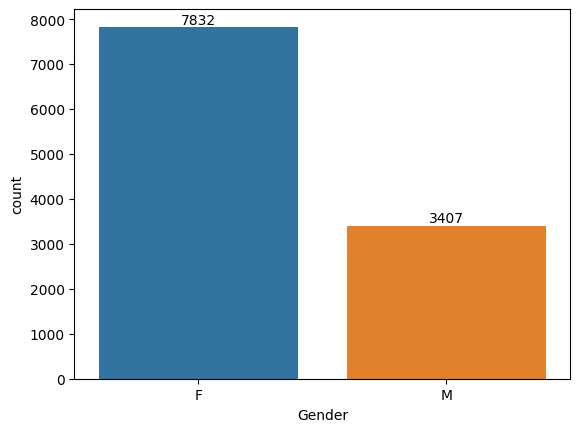

In [45]:
ax = sns. countplot (x = 'Gender', data = df) 

for bars in ax. containers: # Used to display the graphical values 
  ax.bar_label(bars)

From above graphs we can see that most of the buyers are females !

2. Age

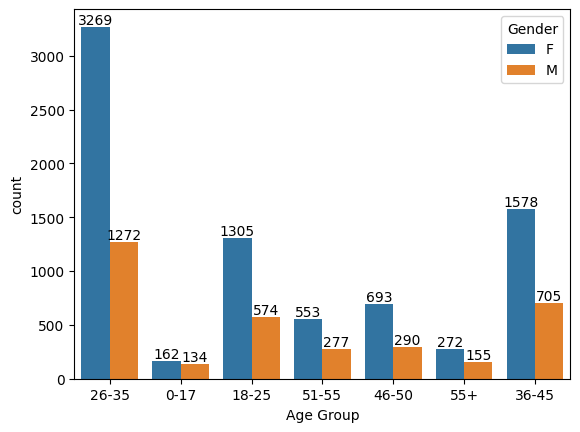

In [56]:
ax = sns. countplot (data = df, x = 'Age Group', hue = 'Gender') # 'hue' will show us the number of female and male buyers for every range of age group

for bars in ax.containers:
 ax.bar_label (bars)


From above graphs we can see that most of the buyers are of age group between 26-35 are female.

3. Marital Status

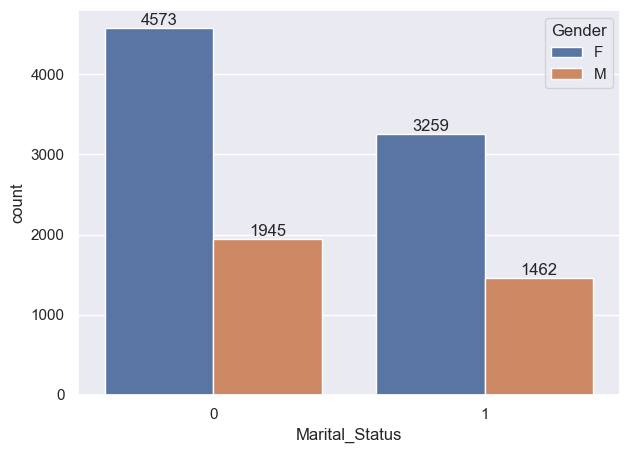

In [84]:
ax = sns.countplot(data = df, x = 'Marital_Status' , hue = 'Gender')

for bars in ax.containers:
 ax.bar_label (bars)

From above graphs we can see that most of the buyers are married(women)

4. Occupation

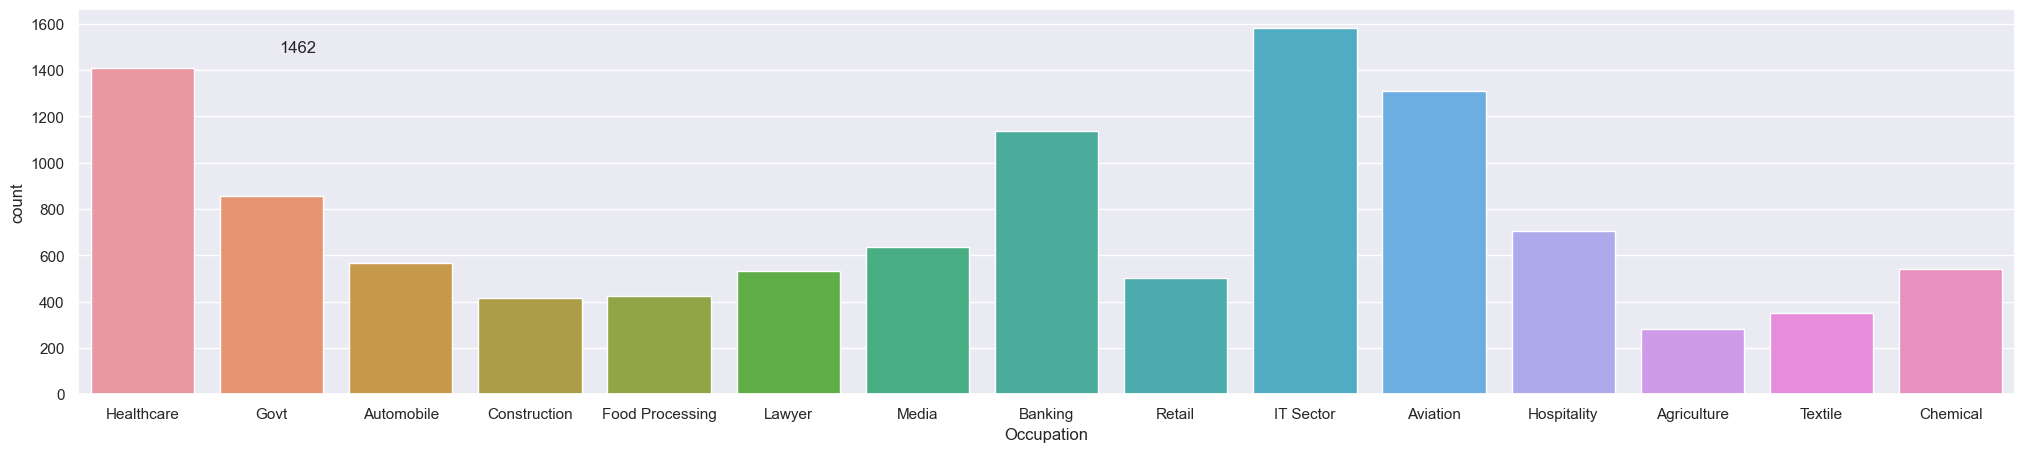

In [102]:
ax = sns.countplot(x ='Occupation', data = df)
sns.set(rc={'figure.figsize':(20,5)})

for ax.bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

5. Product Category

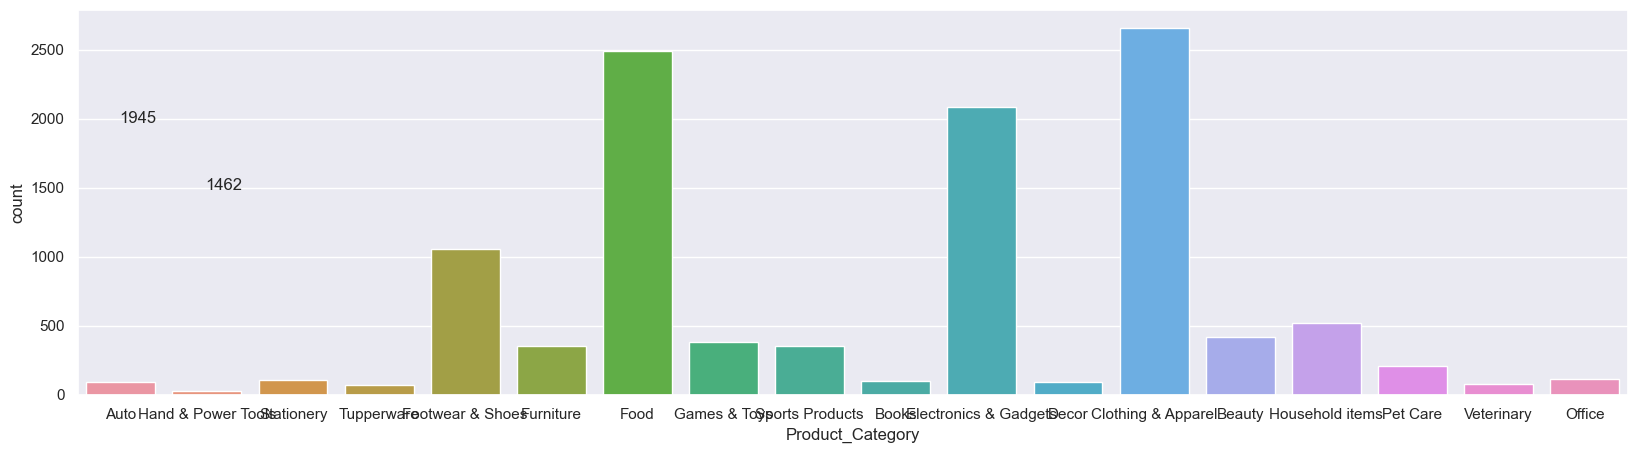

In [120]:
ax = sns.countplot(x ='Product_Category', data = df)
sns.set(rc={'figure.figsize':(20,6)})
for ax.bars in ax.containers:
    ax.bar_label(bars)


From above graphs we can see that most of the sales are in the category of Clothing and Apparel

# Conclusion :

Married women age group 26-35 yrs working in IT, Healthcare and Aviation are more likely to buy products from Clothing and Apparel category